In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import torch
import torchmetrics
from sklearn import metrics

NUM_TAC_LEVELS = 2

# Learning rate experiment ROC curves

shuffled_results = ["results/lr-experiments/lr-1/labels_vs_pred_generic_AdjustHD_1_1.00000_test_ratio_0.30000_shuffle.csv",
                    "results/lr-experiments/lr-2/labels_vs_pred_generic_AdjustHD_1_2.00000_test_ratio_0.30000_shuffle.csv",
                    "results/lr-experiments/lr-3/labels_vs_pred_generic_AdjustHD_1_3.00000_test_ratio_0.30000_shuffle.csv",
                    "results/lr-experiments/lr-4/labels_vs_pred_generic_AdjustHD_1_4.00000_test_ratio_0.30000_shuffle.csv",
                    "results/lr-experiments/lr-5/labels_vs_pred_generic_AdjustHD_1_5.00000_test_ratio_0.30000_shuffle.csv"]

ordered_results = ["results/lr-experiments/lr-1/labels_vs_pred_generic_AdjustHD_1_1.00000_test_ratio_0.30000_ordered.csv",
                    "results/lr-experiments/lr-2/labels_vs_pred_generic_AdjustHD_1_2.00000_test_ratio_0.30000_ordered.csv",
                    "results/lr-experiments/lr-3/labels_vs_pred_generic_AdjustHD_1_3.00000_test_ratio_0.30000_ordered.csv",
                    "results/lr-experiments/lr-4/labels_vs_pred_generic_AdjustHD_1_4.00000_test_ratio_0.30000_ordered.csv",
                    "results/lr-experiments/lr-5/labels_vs_pred_generic_AdjustHD_1_5.00000_test_ratio_0.30000_ordered.csv"]



/home/msegura/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Shuffled Results

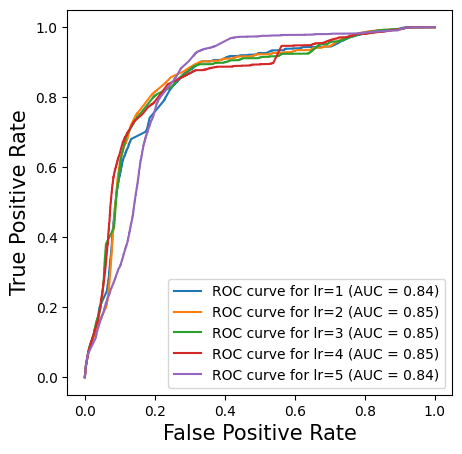

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

for i, fname in enumerate(shuffled_results):
    with open(fname, "r", newline="") as file:
        reader = csv.reader(file)
        y_true = np.array(next(reader), dtype=int)
        y_preds = np.array(next(reader), dtype=int)
        preds = []
        for j in range(len(y_true)):
            x = np.array(next(reader), dtype=float)
            #Apply softmax for conversion from logits to probabilities
            s_max = np.exp(x)/sum(np.exp(x))
            preds.append(s_max)
        preds = np.array(preds)

        metrics.RocCurveDisplay.from_predictions(
            y_true,
            preds[:, 1],
            name=f"ROC curve for lr={i+1}",
            ax=ax,
        )
        

plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
#plt.title("ROC Curves for Shuffled Data")
plt.legend()
        

### Ordered Results

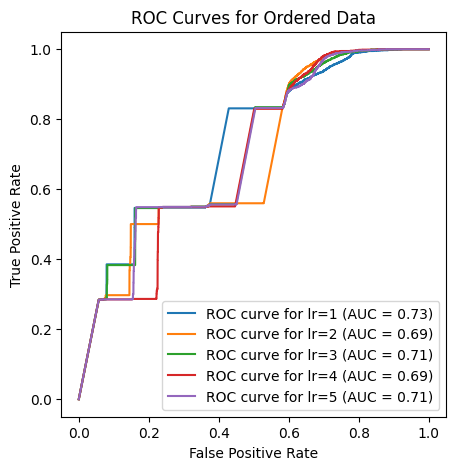

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))

for i, fname in enumerate(ordered_results):
    with open(fname, "r", newline="") as file:
        reader = csv.reader(file)
        y_true = np.array(next(reader), dtype=int)
        y_preds = np.array(next(reader), dtype=int)
        preds = []
        for j in range(len(y_true)):
            x = np.array(next(reader), dtype=float)
            #Apply softmax for conversion from logits to probabilities
            s_max = np.exp(x)/sum(np.exp(x))
            preds.append(s_max)
        preds = np.array(preds)

        metrics.RocCurveDisplay.from_predictions(
            y_true,
            preds[:, 1],
            name=f"ROC curve for lr={i+1}",
            ax=ax,
        )
        

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Ordered Data")
plt.legend()
        